In [1]:
import pandas as pd
import numpy as np

## Read the data

In [2]:
advt = pd.read_csv( "Advertising.csv" )

In [3]:
advt.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
advt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 9.4 KB


## Remove the first column

In [5]:
advt = advt[["TV", "Radio", "Newspaper", "Sales"]]

In [6]:
advt.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Let plot the distribution of variables

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

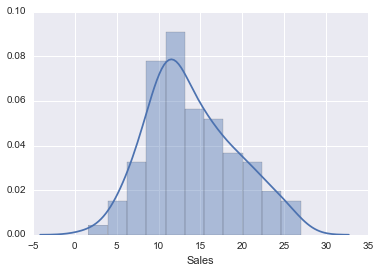

In [8]:
sns.distplot( advt.Sales )

In [ ]:
sns.distplot( advt.Newspaper )

In [ ]:
sns.distplot( advt.Radio )

In [ ]:
sns.distplot( advt.TV )

## Is there a relation ship between sales and spend on various advertisements 

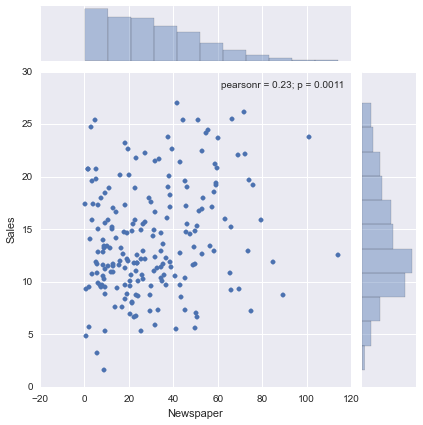

In [12]:
sns.jointplot(  advt.Newspaper, advt.Sales )

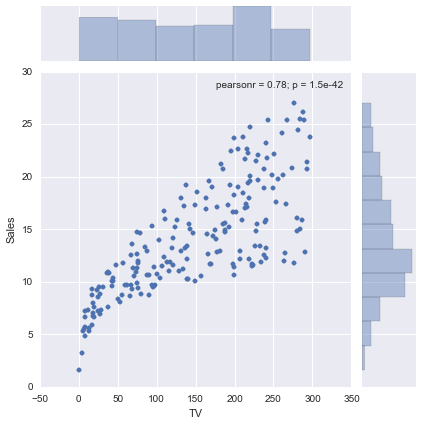

In [13]:
sns.jointplot(  advt.TV, advt.Sales )

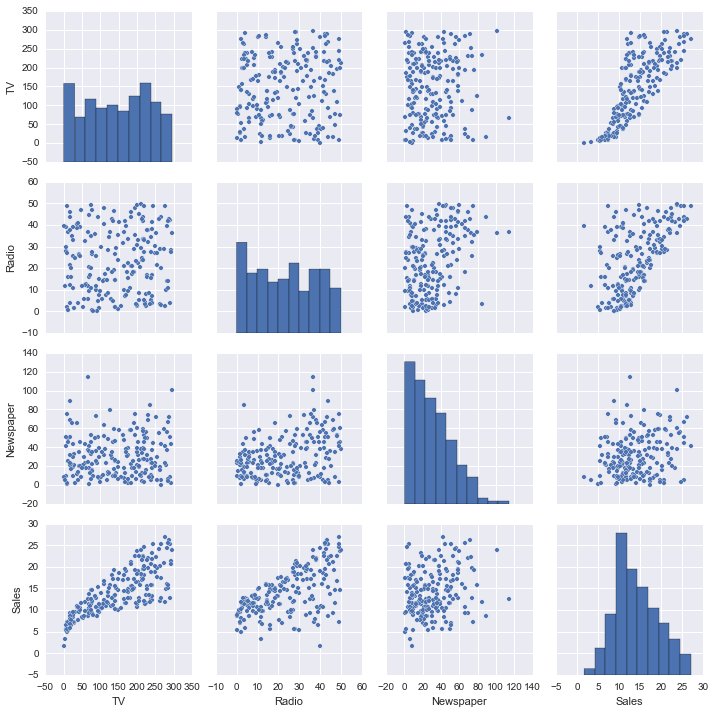

In [14]:
sns.pairplot( advt )

## Calculating correlations 

In [15]:
advt.TV.corr( advt.Sales )

0.7822244248616067

In [16]:
advt.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


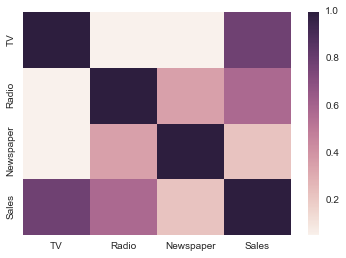

In [17]:
sns.heatmap( advt.corr() )

## Building the model using Statsmodels APIs

In [18]:
import statsmodels.formula.api as smf

In [19]:
lm = smf.ols( 'Sales ~ TV', advt ).fit()

## Getting model parameters 

In [20]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [21]:
# Default Confidence interval is 95%
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


## Evaluating the model

In [22]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [23]:
lm.rsquared

0.61187505085007099

In [24]:
lm.rsquared_adj

0.60991482383416229

## Making Predictions

In [25]:
lmpredict = lm.predict( {'TV': advt.TV } )

In [26]:
lmpredict[0:10]

array([ 17.97077451,   9.14797405,   7.85022376,  14.23439457,
        15.62721814,   7.44616232,   9.76595037,  12.74649773,
         7.44140866,  16.53041431])

In [1]:
from sklearn import metrics

## Calculating mean square error ... RMSE

In [28]:
mse = metrics.mean_squared_error( advt.Sales, lmpredict )

In [29]:
rmse = np.sqrt( mse )

In [61]:
rmse

1.9485372043446385

## Get the residues and plot them

In [63]:
lm.resid[1:10]

1   -1.945362
2   -3.037018
3    0.882884
4   -0.323908
5   -5.312084
6    0.081788
7    1.094484
8    1.090621
9   -1.951697
dtype: float64

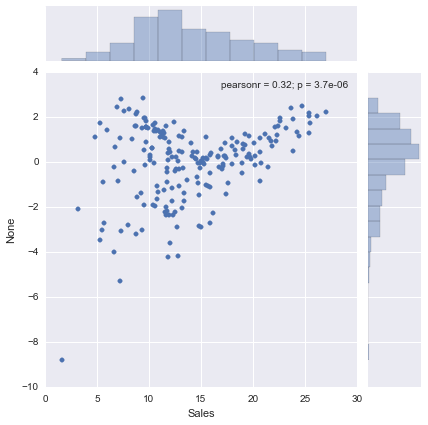

In [64]:
sns.jointplot(  advt.Sales, lm.resid )

## Multiple Linear Regression.. using multiple regressors to build a model

In [31]:
lm = smf.ols( 'Sales ~ TV + Radio + Newspaper', advt ).fit()

In [32]:
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [33]:
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

In [34]:
lm = smf.ols( 'Sales ~ TV + Radio', advt ).fit()

In [35]:
lm.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [36]:
lm.pvalues

Intercept    4.565557e-19
TV           5.436980e-82
Radio        9.776972e-59
dtype: float64

In [37]:
lmpredict = lm.predict( {'TV': advt.TV, 'Radio':advt.Radio } )

In [38]:
mse = metrics.mean_squared_error( advt.Sales, lmpredict )
rmse = np.sqrt( mse )

In [65]:
rmse

1.9485372043446385

In [ ]:
sns.jointplot(  advt.Sales, lm.resid )

## Using sklearn library to build the model

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lreg = LinearRegression()

In [42]:
lreg.fit( advt[["TV", "Radio"]], advt.Sales )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
lreg.intercept_

2.9210999124051327

In [72]:
lreg.coef_

array([ 0.04575482,  0.18799423])

In [75]:
lreg.score

<bound method LinearRegression.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

## Predicting and evaluating the model

In [45]:
lpredict = lreg.predict( advt[["TV", "Radio"]] )

In [46]:
mse = metrics.mean_squared_error( advt.Sales, lpredict )

In [47]:
rmse = np.sqrt( mse )

In [48]:
rmse

1.6687030593661931

In [49]:
from sklearn.metrics import r2_score

In [70]:
r2_score( advt.Sales, lpredict )

0.89719426108289557

In [ ]:
sns.jointplot(  advt.Sales, advt.Sales - lpredict )

In [51]:
from sklearn.feature_selection import f_regression

In [52]:
f_regression( advt[["TV", "Radio", "Newspaper"]], advt.Sales )

(array([ 312.14499437,   98.42158757,   10.88729908]),
 array([  1.46738970e-42,   4.35496600e-19,   1.14819587e-03]))

## Splitting into Train and test data sets.. 

In [53]:
from sklearn.cross_validation import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split( advt[["TV", "Radio", "Newspaper"]], advt.Sales, test_size=0.3, random_state = 42 )

In [55]:
len( X_train )

140

In [ ]:
len( X_test )

## Building the model with train set and make predictions on test set 

In [57]:
linreg = LinearRegression()
linreg.fit( X_train, y_train )
y_pred = linreg.predict( X_test )

In [58]:
rmse = np.sqrt( metrics.mean_squared_error( y_test, y_pred ) )

In [59]:
rmse

1.9485372043446385

In [60]:
metrics.r2_score( y_test, y_pred )

0.86094665082303679